In [2]:
import glob
import itertools
import numpy as np 
import pandas as pd
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer


/var/folders/9x/00rwcm8x4897s1m2h7wcc84h0000gn/T/ipykernel_50462/2899860898.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data_folder = '/Users/eugenegan/Documents/cs4220_projects/data'
curr_folder = 'syn2'
file = f'{data_folder}/{curr_folder}_final.csv'

In [4]:
# read_file and check type
df = pd.read_csv(file,sep='\t', index_col=False)

/var/folders/9x/00rwcm8x4897s1m2h7wcc84h0000gn/T/ipykernel_50462/3774833622.py:2: DtypeWarning: Columns (1,23,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file,sep='\t', index_col=False)


In [5]:
df = df.iloc[:, 1:]
df.isnull().sum()

Chr                     0
START_POS_REF           0
END_POS_REF             0
REF                    18
ALT                    18
REF_MFVdVs             18
ALT_MFVdVs             18
Sample_Name            18
FILTER_Mutect2         18
FILTER_Freebayes       18
FILTER_Vardict         18
FILTER_Varscan         18
m2_MQ               30678
m2_FS               30678
m2_MQ0              30678
m2_MQRankSum        30679
m2_NLOD             30678
m2_PON              45405
f_MQMR              34262
f_MQM               34262
f_AB                34262
f_ABP               34262
f_AC                28030
f_AF                28030
f_AN                28030
f_AO                34262
f_GTI               34262
f_LEN               28030
f_MEANALT           34262
f_MIN_DP            45405
f_NS                28030
f_NUMALT            34262
f_ODDS              34262
f_PAIRED            34262
f_PAIREDR           34262
f_PAO               34262
f_PQA               34262
f_PQR               34262
f_PRO       

In [6]:
df.shape

(45405, 56)

In [7]:
selected_columns = df.iloc[:, 3:8].columns
na_rows = df[df[selected_columns].isnull().any(axis=1)]
na_rows

,Chr,START_POS_REF,END_POS_REF,REF,ALT,REF_MFVdVs,ALT_MFVdVs,Sample_Name,FILTER_Mutect2,FILTER_Freebayes,...,vs_SPV,vs_SSC,vd_AF,vd_DP,vd_MSI,vd_SAMPLE,vd_SOR,vd_SSF,vd_VD,is_snv
1484,1,108951682,108951682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2570,1,161625374,161625374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4482,10,47193330,47193330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
5217,10,111002443,111002443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
9640,13,56120064,56120064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
9658,13,58565812,58565812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
11829,15,23450550,23450550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
19538,2,110504640,110504640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
23694,22,17175646,17175646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
24515,3,21711775,21711775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [8]:
filtered_df = df.dropna(subset=selected_columns, how='all')
filtered_df

,Chr,START_POS_REF,END_POS_REF,REF,ALT,REF_MFVdVs,ALT_MFVdVs,Sample_Name,FILTER_Mutect2,FILTER_Freebayes,...,vs_SPV,vs_SSC,vd_AF,vd_DP,vd_MSI,vd_SAMPLE,vd_SOR,vd_SSF,vd_VD,is_snv
0,1,101674,101674,C,A,NA/NA/NA/C/,NA/NA/NA/A/,dream2-T,False,False,...,0.037328,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1,109534,109534,A,C,NA/NA/A/A/,NA/NA/C/C/,dream2-T,False,False,...,0.221160,6.0,0.1765,17.0,2.0,NaN,inf,0.26154,3.0,False
2,1,137172,137172,T,G,T/NA/NA/NA/,G/NA/NA/NA/,dream2-T,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,1,149875,149875,G,C,NA/NA/NA/G/,NA/NA/NA/C/,dream2-T,False,False,...,0.433330,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,1,149876,149876,C,G,NA/NA/NA/C/,NA/NA/NA/G/,dream2-T,False,False,...,0.433330,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45400,Y,59027438,59027438,G,T,NA/NA/NA/G/,NA/NA/NA/T/,dream2-T,False,False,...,0.174180,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
45401,Y,59027721,59027721,C,A,C/NA/NA/NA/,A/NA/NA/NA/,dream2-T,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
45402,Y,59028997,59028997,A,G,A/NA/NA/NA/,G/NA/NA/NA/,dream2-T,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
45403,Y,59031582,59031582,G,A,G/NA/NA/NA/,A/NA/NA/NA/,dream2-T,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


# Missing Data Exploration

#### The entirely missing column includes  
1. m2_PON              1.000000 -- Description="Count from Panel of Normals">
2. f_MIN_DP            1.000000 -- Description="Total read depth at the locus">
3. vd_SAMPLE           0.999878 -- Description="Sample name (with whitespace translated to underscores)">

m2_PON              1.000000
f_MIN_DP            1.000000
vd_SAMPLE           0.999846
f_MEANALT           0.754489
f_PAIREDR           0.754489
f_AO                0.754489
f_GTI               0.754489
f_NUMALT            0.754489
f_ODDS              0.754489
f_PAIRED            0.754489
f_PAO               0.754489
f_AB                0.754489
f_PQA               0.754489
f_PQR               0.754489
f_PRO               0.754489
f_QA                0.754489
f_QR                0.754489
f_RO                0.754489
f_RPP               0.754489
f_ABP               0.754489
f_MQM               0.754489
f_MQMR              0.754489
f_RPL               0.754489
m2_MQRankSum        0.675546
m2_FS               0.675524
m2_NLOD             0.675524
m2_MQ               0.675524
m2_MQ0              0.675524
f_AC                0.617181
f_AN                0.617181
f_AF                0.617181
f_NS                0.617181
f_LEN               0.617181
vd_AF               0.589376
vd_DP         

 The dataset shape and size are :: (45387, 56)


<Axes: >

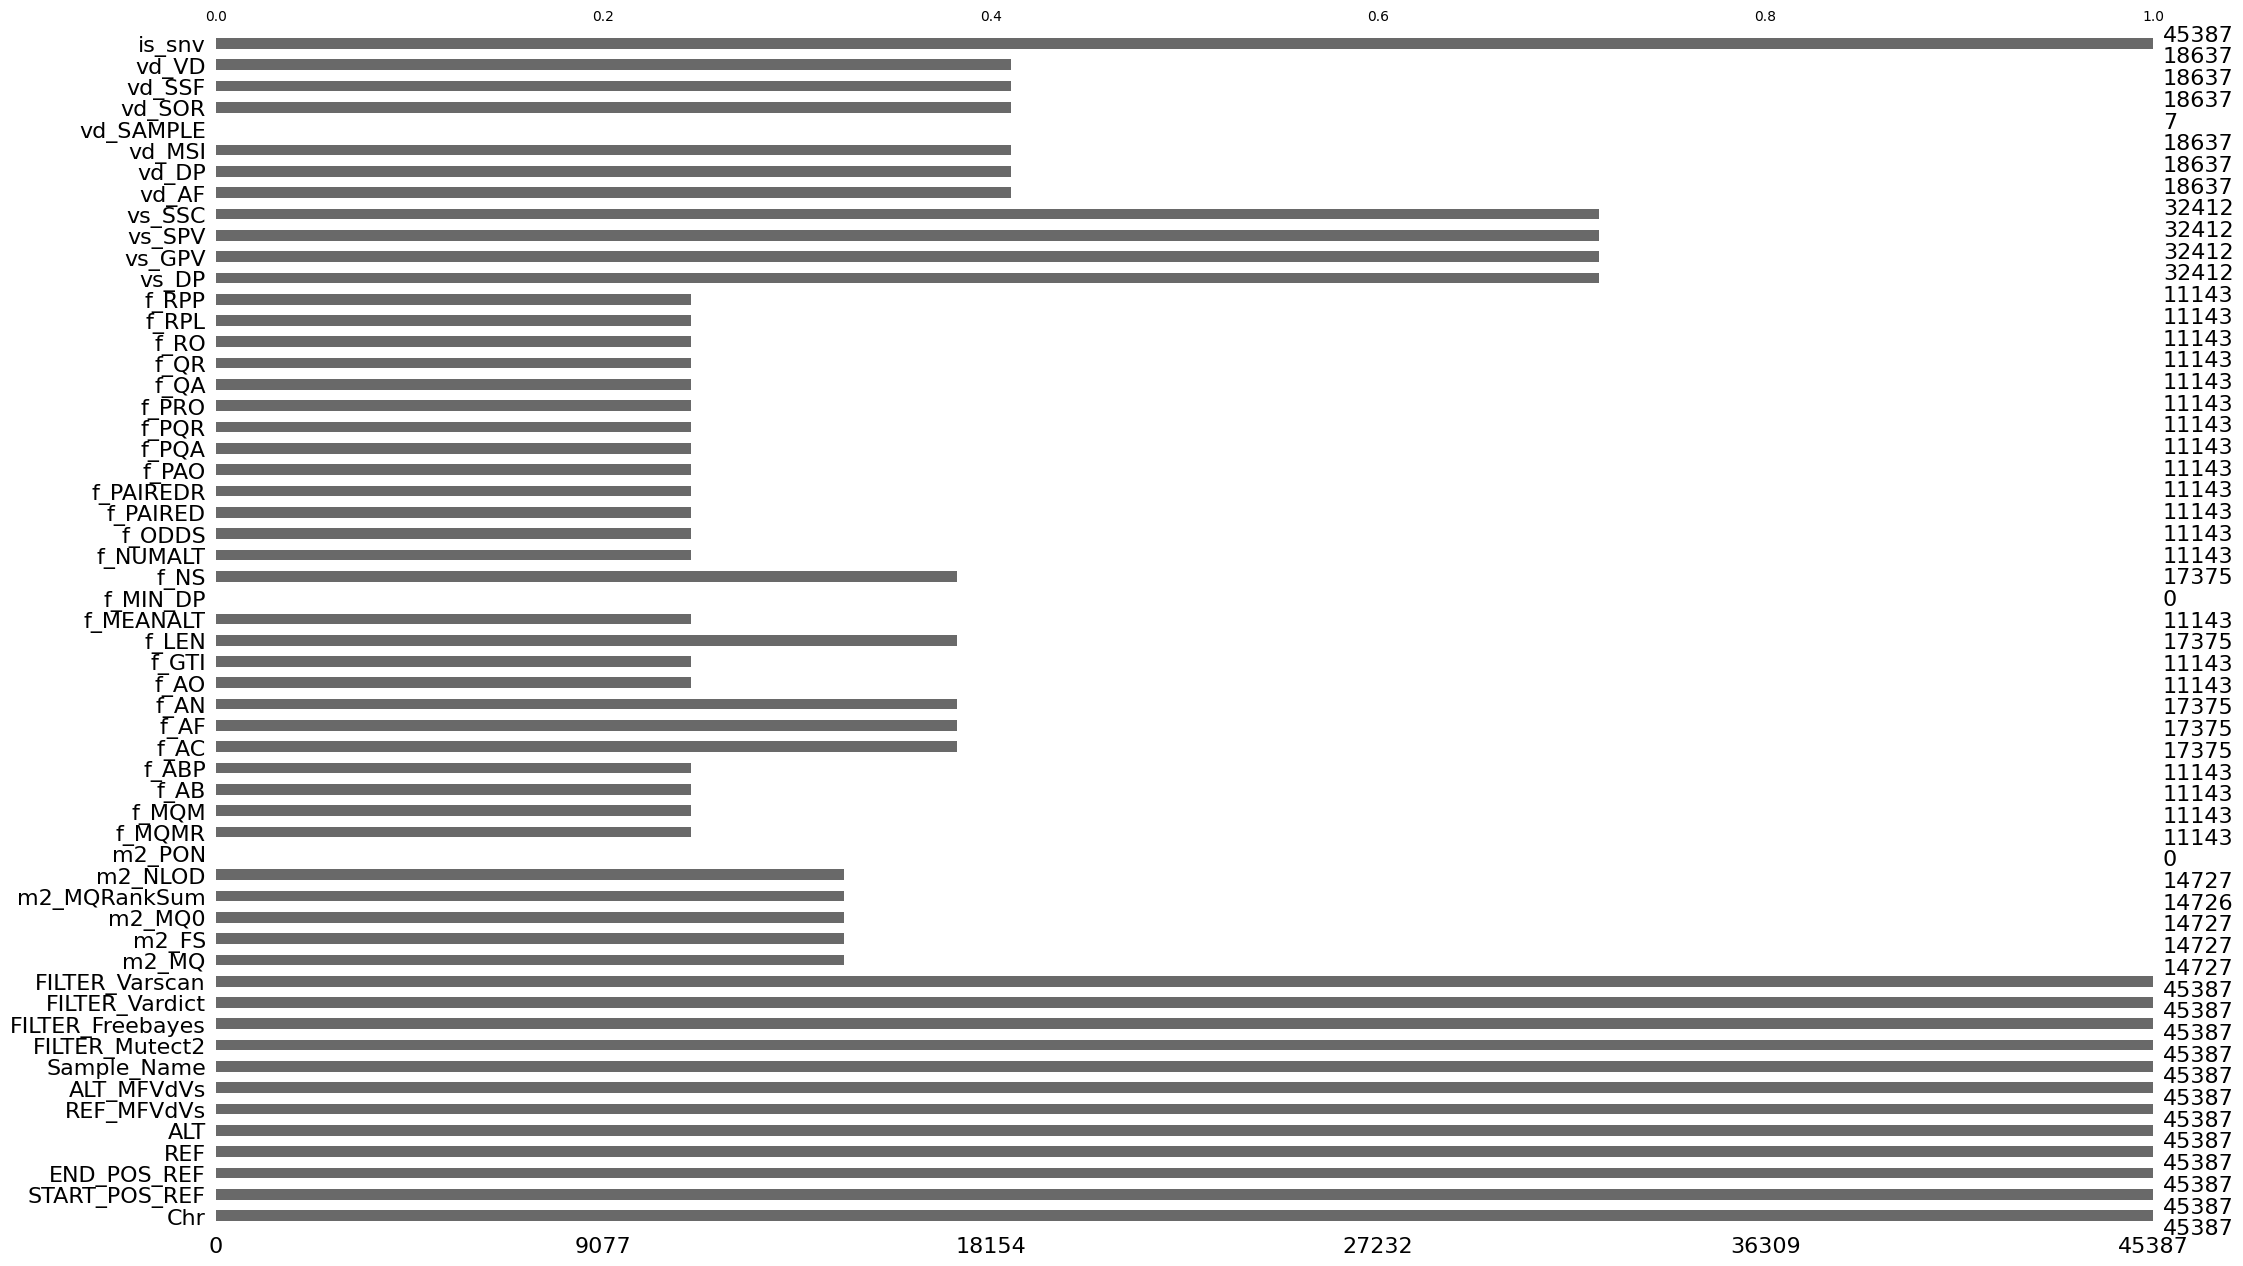

In [9]:
# Check for null values
sorted_list_of_null = (filtered_df.isnull().sum()/len(filtered_df)).sort_values(ascending=False)
display(sorted_list_of_null)
print(f" The dataset shape and size are :: {filtered_df.shape}")
msno.bar(filtered_df)

In [10]:
filtered_series = sorted_list_of_null[sorted_list_of_null == 1]
entire_null_col_lst=list(filtered_series.index)
entire_null_col_lst

['m2_PON', 'f_MIN_DP']

### 1. Missing Completely at Random (MCAR)

The missing values on a given variable (Y) are not associated with other variables in a given data set or with the variable (Y) itself. In other words, there is no particular reason for the missing values.

### 2. Missing at Random (MAR)

MAR occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information.

### 3. Missing Not at Random (MNAR)

Missingness depends on unobserved data or the value of the missing data itself.



<Axes: >

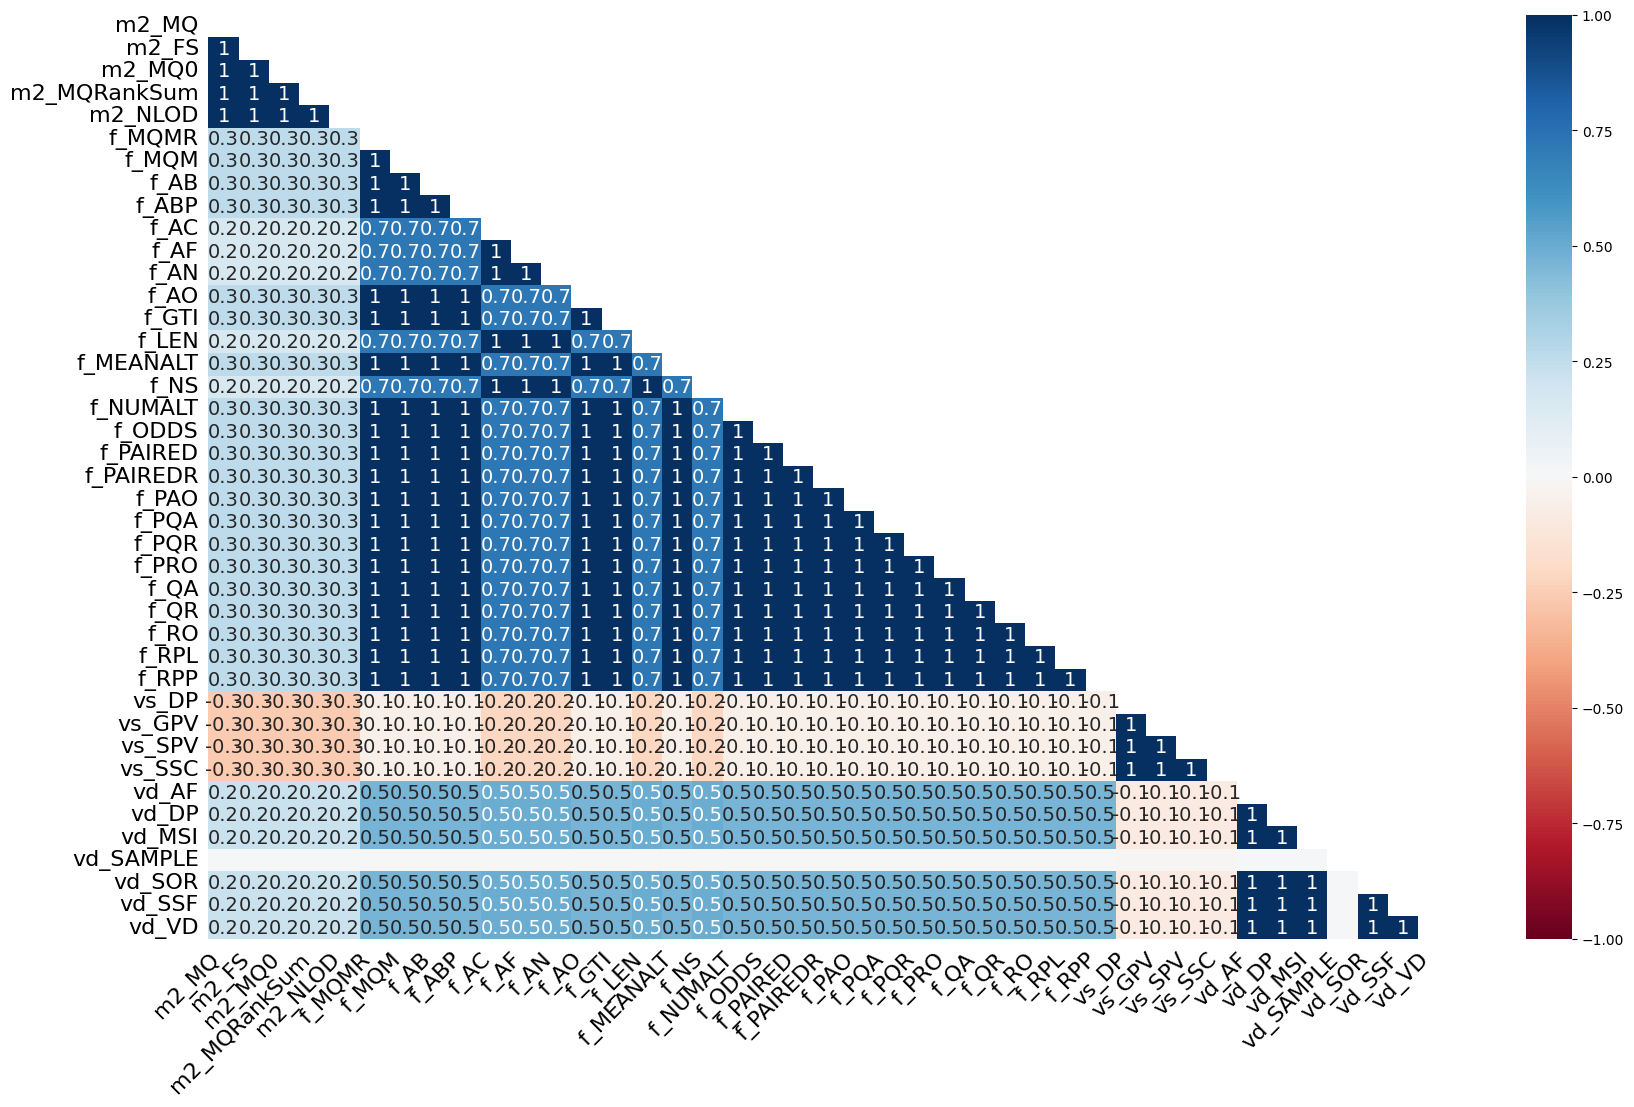

In [11]:
# The heatmap shows that for the algo if it is missing, there is a very high chance 
# That the other parameters use to predict will be missing as well
msno.heatmap(filtered_df)

<Axes: >

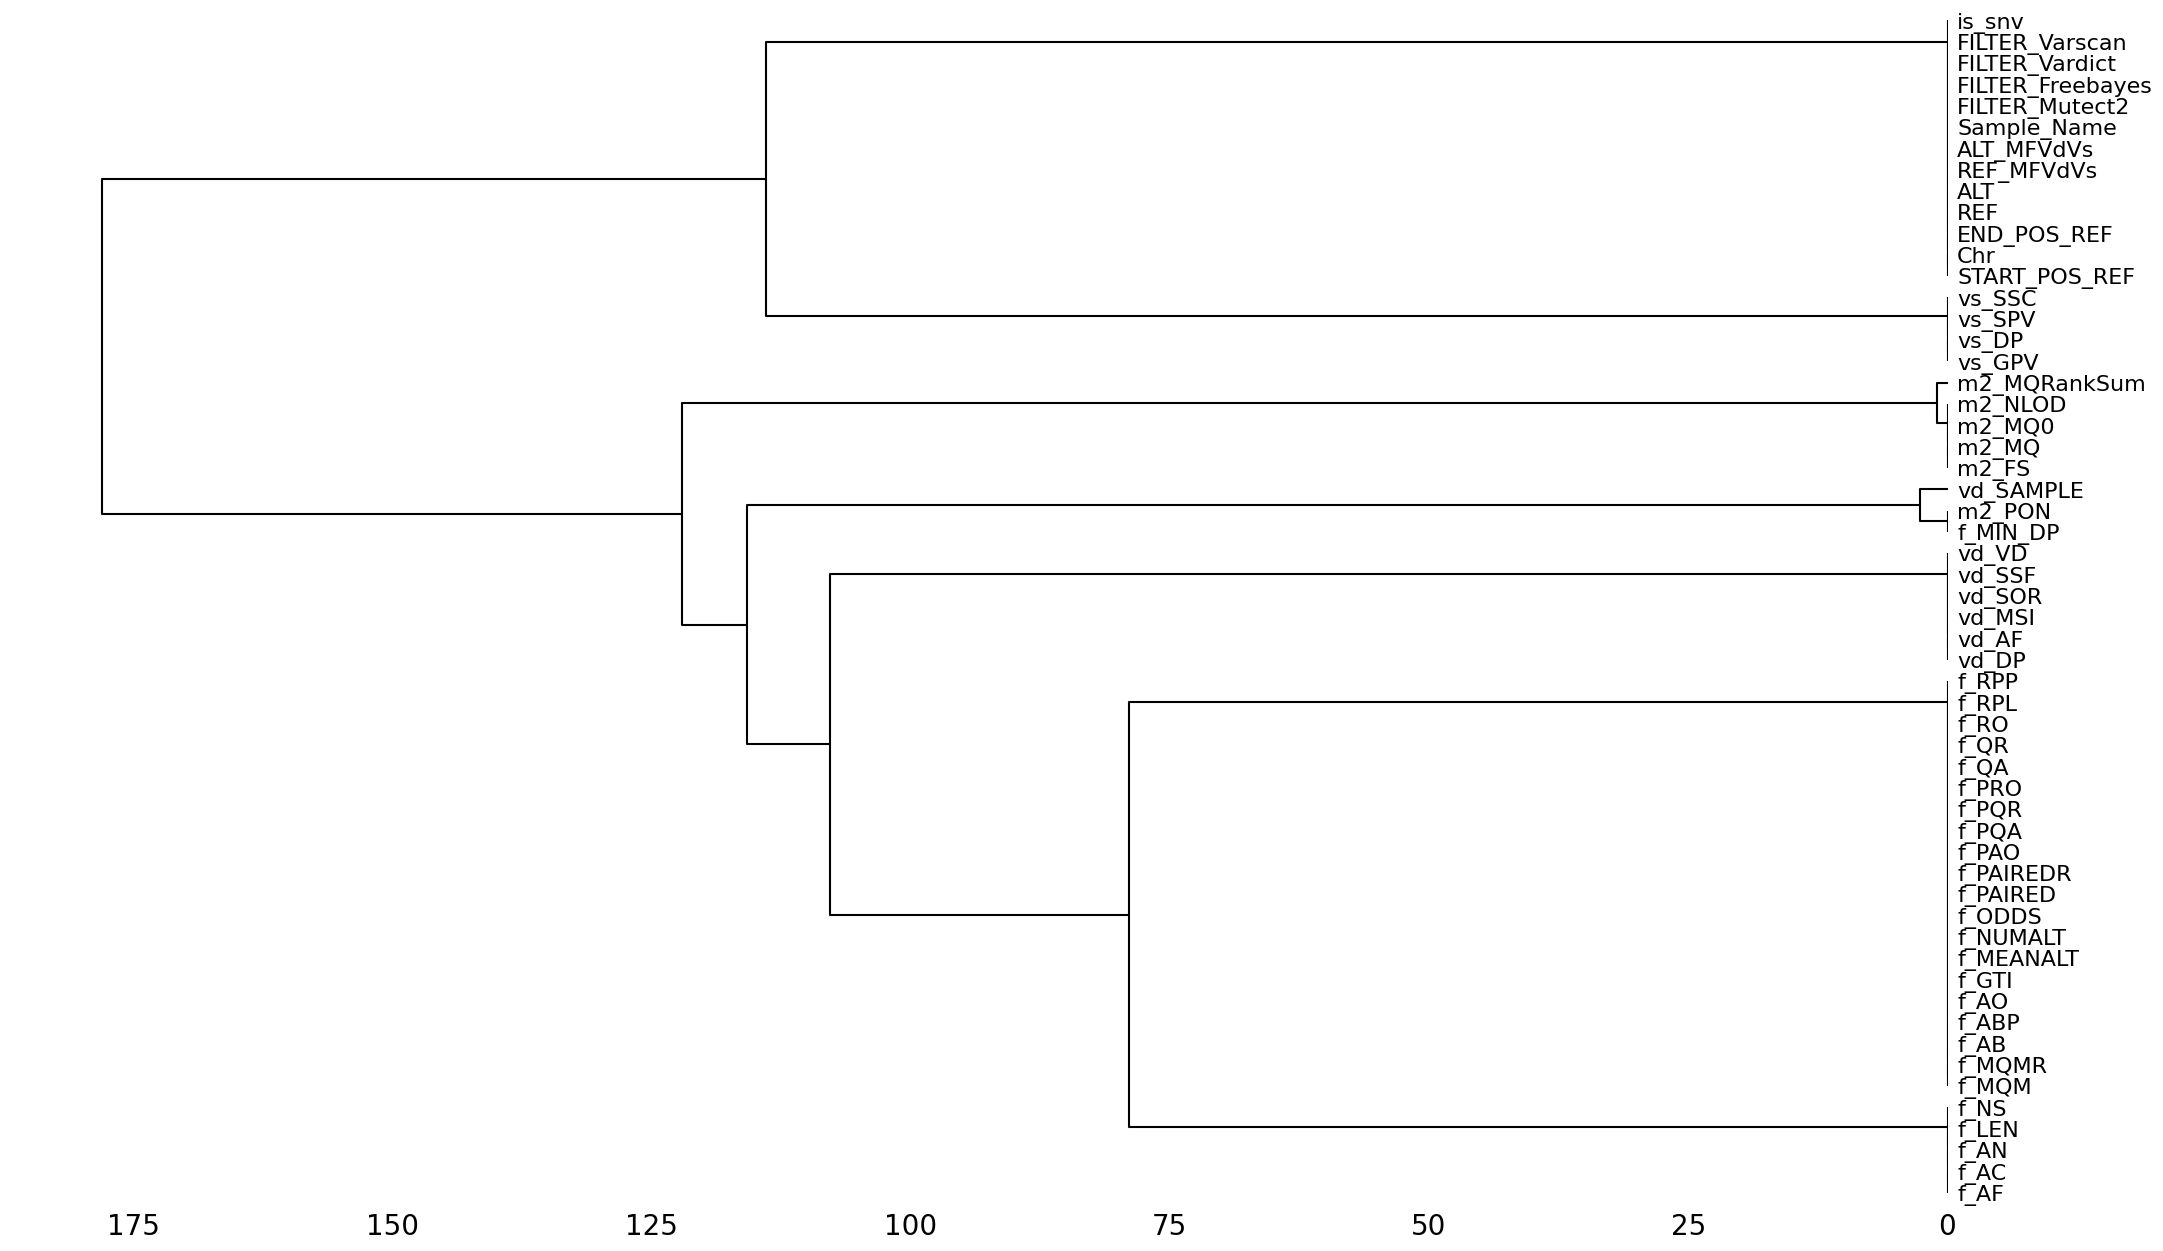

In [12]:
msno.dendrogram(filtered_df)

### Data imputation
1. Imputing with a constant
2. Imputing by statistic -- Mean, Median , Mode
3. KNN Based
4. MICE Based
 
fyi :: Difficulty in doing outlier detection as well due to presence of high amount of missing data

In [13]:
# Change into features and labels 
# Dropping entirely null columns
entire_null_col_lst.append("is_snv")
x_df = filtered_df.copy().drop(columns=entire_null_col_lst)
y_df = filtered_df.copy()[["is_snv"]]

In [14]:
# Split data into categorical and non categorical
list_of_categorical = list()
list_of_numerical = list()

numerical = ["int64", "float64"]
for elem in x_df.dtypes.items():
    name, col_type = elem
    
    if col_type in numerical:
        print(f" numeric {col_type} :: {name}")
        list_of_numerical.append(name)
    else:
        print(f" cat {col_type} :: {name}")
        list_of_categorical.append(name)


 cat object :: Chr
 numeric int64 :: START_POS_REF
 numeric int64 :: END_POS_REF
 cat object :: REF
 cat object :: ALT
 cat object :: REF_MFVdVs
 cat object :: ALT_MFVdVs
 cat object :: Sample_Name
 cat object :: FILTER_Mutect2
 cat object :: FILTER_Freebayes
 cat object :: FILTER_Vardict
 cat object :: FILTER_Varscan
 numeric float64 :: m2_MQ
 numeric float64 :: m2_FS
 numeric float64 :: m2_MQ0
 numeric float64 :: m2_MQRankSum
 numeric float64 :: m2_NLOD
 numeric float64 :: f_MQMR
 numeric float64 :: f_MQM
 numeric float64 :: f_AB
 numeric float64 :: f_ABP
 cat object :: f_AC
 cat object :: f_AF
 numeric float64 :: f_AN
 numeric float64 :: f_AO
 numeric float64 :: f_GTI
 cat object :: f_LEN
 numeric float64 :: f_MEANALT
 numeric float64 :: f_NS
 numeric float64 :: f_NUMALT
 numeric float64 :: f_ODDS
 numeric float64 :: f_PAIRED
 numeric float64 :: f_PAIREDR
 numeric float64 :: f_PAO
 numeric float64 :: f_PQA
 numeric float64 :: f_PQR
 numeric float64 :: f_PRO
 numeric float64 :: f_QA


### Handling categorical variable

In [15]:
x_df[list_of_categorical].describe()

,Chr,REF,ALT,REF_MFVdVs,ALT_MFVdVs,Sample_Name,FILTER_Mutect2,FILTER_Freebayes,FILTER_Vardict,FILTER_Varscan,f_AC,f_AF,f_LEN,vd_SAMPLE
count,45387,45387,45387,45387,45387,45387,45387,45387,45387,45387,17375.0,17375.00,17375.0,7
unique,74,5,5,61,567,1,2,2,2,2,9.0,9.00,37.0,1
top,1,G,A,NA/NA/NA/G/,NA/NA/NA/A/,dream2-T,False,False,False,True,1.0,0.25,1.0,dream2-T
freq,3546,11883,12510,4442,4772,45387,33088,36308,34145,27078,7313.0,6758.00,10676.0,7


In [16]:
description = x_df[list_of_categorical].describe()
# remove columns with only 0 or 1 unique value in the description cause they will not be useful in ML
columns_to_drop = description.columns[(description.loc['unique'].astype(int) == 0) | (description.loc['unique'].astype(int) == 1)]
print(columns_to_drop)
list_of_categorical = [elem for elem in list_of_categorical if elem not in columns_to_drop]
x_df.drop(columns=columns_to_drop, inplace=True)

Index(['Sample_Name', 'vd_SAMPLE'], dtype='object')


In [17]:
# non_null_values = x_df['f_AC'].dropna().to_numpy()
print(np.unique(x_df['f_AC'].astype(str)))
print(np.unique(x_df['f_AF'].astype(str)))
print(np.unique(x_df['f_LEN'].astype(str)))

['1.0' '2.0' '3,1' '3.0' '4.0' 'nan']
['0.25' '0.5' '0.75' '0.75,0.25' '1.0' 'nan']
['1,1' '1.0' '10.0' '11.0' '12.0' '15.0' '16.0' '17.0' '18.0' '2.0' '20.0'
 '25.0' '26.0' '27.0' '3.0' '4.0' '5.0' '6.0' '62.0' '7.0' '8.0' '9.0'
 'nan']


In [18]:
print(np.unique(y_df['is_snv'].astype(str)))

['False']


In [114]:
print(np.array(x_df[x_df['f_AC'] == '3,1']))
print(np.array(x_df[x_df['f_AF']=='0.75,0.25']))
print(np.array(x_df[x_df['f_LEN']=='1,1']))

[[11 62158661 62158661 'G' 'A,T' 'NA/G/NA/NA/' 'NA/A,T/NA/NA/' False
  False False False nan nan nan nan nan nan nan nan nan '3,1' '0.75,0.25'
  4.0 nan nan '1,1' nan 2.0 nan nan nan nan nan nan nan nan nan nan nan
  nan nan 104.0 0.0 1.0 0.0 0.6735 49.0 3.0 0.0 0.0 33.0]]
[[11 62158661 62158661 'G' 'A,T' 'NA/G/NA/NA/' 'NA/A,T/NA/NA/' False
  False False False nan nan nan nan nan nan nan nan nan '3,1' '0.75,0.25'
  4.0 nan nan '1,1' nan 2.0 nan nan nan nan nan nan nan nan nan nan nan
  nan nan 104.0 0.0 1.0 0.0 0.6735 49.0 3.0 0.0 0.0 33.0]]
[[11 62158661 62158661 'G' 'A,T' 'NA/G/NA/NA/' 'NA/A,T/NA/NA/' False
  False False False nan nan nan nan nan nan nan nan nan '3,1' '0.75,0.25'
  4.0 nan nan '1,1' nan 2.0 nan nan nan nan nan nan nan nan nan nan nan
  nan nan 104.0 0.0 1.0 0.0 0.6735 49.0 3.0 0.0 0.0 33.0]]


In [115]:
# Filter both DataFrames based on the condition applied to x_df
filtered_x_df = x_df[(x_df['f_AC'] != '3,1')|(x_df['f_AF']!='0.75,0.25')| (x_df['f_LEN'] != '1,1')]
filtered_y_df = y_df[y_df.index.isin(filtered_x_df.index)]

In [116]:
# filtered_x_df['f_AC']=pd.to_numeric(filtered_x_df['f_AC'])
filtered_var=['f_AC', 'f_AF', 'f_LEN']
for var in filtered_var:
    filtered_x_df[var]=filtered_x_df[var].astype("float64")
    list_of_numerical.append(var)
    list_of_categorical.remove(var)


/var/folders/9x/00rwcm8x4897s1m2h7wcc84h0000gn/T/ipykernel_72896/1455461663.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_x_df[var]=filtered_x_df[var].astype("float64")
/var/folders/9x/00rwcm8x4897s1m2h7wcc84h0000gn/T/ipykernel_72896/1455461663.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_x_df[var]=filtered_x_df[var].astype("float64")
/var/folders/9x/00rwcm8x4897s1m2h7wcc84h0000gn/T/ipykernel_72896/1455461663.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [117]:
# x_df[list_of_categorical].info()
filtered_x_df[list_of_categorical].describe()

,Chr,REF,ALT,REF_MFVdVs,ALT_MFVdVs,FILTER_Mutect2,FILTER_Freebayes,FILTER_Vardict,FILTER_Varscan
count,45386,45386,45386,45386,45386,45386,45386,45386,45386
unique,74,5,4,61,566,2,2,2,2
top,1,G,A,NA/NA/NA/G/,NA/NA/NA/A/,False,False,False,True
freq,3546,11882,12510,4442,4772,33087,36307,34144,27078


### Handling numerical variable

In [118]:
filtered_x_df[list_of_numerical].describe()

/Users/eugenegan/Documents/cs4220_projects/test/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/eugenegan/Documents/cs4220_projects/test/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,START_POS_REF,END_POS_REF,m2_MQ,m2_FS,m2_MQ0,m2_MQRankSum,m2_NLOD,f_MQMR,f_MQM,f_AB,...,vs_SSC,vd_AF,vd_DP,vd_MSI,vd_SOR,vd_SSF,vd_VD,f_AC,f_AF,f_LEN
count,4.538600e+04,4.538600e+04,14727.000000,14727.000000,14727.000000,14726.000000,14727.000000,11143.000000,11143.000000,11143.000000,...,32411.000000,18636.000000,18636.000000,18636.000000,18636.00000,18636.000000,18636.000000,17374.000000,17374.000000,17374.000000
mean,7.065208e+07,7.065208e+07,56.597055,8.437627,18.394242,-0.818486,12.286011,51.601989,53.996726,0.308909,...,13.119280,0.322689,40.970648,3.625975,inf,0.087065,11.206106,1.402325,0.392555,1.073213
std,5.624396e+07,5.624396e+07,6.113040,16.638584,169.327647,1.712579,48.821384,16.626604,11.523508,0.162737,...,12.288727,0.199266,78.883143,4.534555,NaN,0.141862,20.780439,0.671588,0.226908,0.959158
min,3.000000e+00,3.000000e+00,10.040000,0.000000,0.000000,-14.605000,0.507000,0.000000,6.495280,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.250000,1.000000
25%,2.481417e+07,2.481417e+07,55.365000,0.000000,0.000000,-1.256750,4.835000,53.142900,54.635400,0.236842,...,6.000000,0.166700,20.000000,1.000000,5.18288,0.000080,5.000000,1.000000,0.250000,1.000000
50%,5.864697e+07,5.864697e+07,60.000000,3.058000,0.000000,0.000000,8.250000,59.857100,60.000000,0.305556,...,9.000000,0.294100,31.000000,2.000000,NaN,0.013780,9.000000,1.000000,0.250000,1.000000
75%,1.066317e+08,1.066317e+08,60.000000,8.833500,1.000000,0.000000,12.370000,60.000000,60.000000,0.352941,...,15.000000,0.375000,45.000000,4.000000,NaN,0.122023,14.000000,2.000000,0.500000,1.000000
max,2.492396e+08,2.492396e+08,61.690000,248.837000,6609.000000,14.931000,1695.360000,70.000000,70.000000,0.900000,...,168.000000,1.000000,5511.000000,48.000000,inf,1.000000,1342.000000,4.000000,1.000000,62.000000


In [121]:
# Basic check of which rows have inf values
numerical_df = filtered_x_df[list_of_numerical].copy()
m = (numerical_df == np.inf)
inf_check = numerical_df.loc[m.any(axis=1), m.any(axis=0)]
display(inf_check) # Description="Odds ratio">
# Replace inf value with nan to prevent numerical overflow for imputation methods
# df.replace(np.inf, np.nan)

# OR=1 Exposure does not affect odds of outcome
# OR>1 Exposure associated with higher odds of outcome
# OR<1 Exposure associated with lower odds of outcome

# Should I replace inf with a high value?
numerical_df = numerical_df.replace(np.inf, 100)

,vd_SOR
1,inf
9,inf
17,inf
19,inf
35,inf
...,...
45039,inf
45296,inf
45302,inf
45303,inf


### Mean imputation

In [122]:
numerical_mean_imp = numerical_df.copy()
# Impute with numerical columns mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# Replacing the values
numerical_mean_imp.iloc[:,:] = imp.fit_transform(numerical_mean_imp)

### Median imputation

In [123]:
numerical_median_imp = numerical_df.copy()
# Impute with numerical columns mean
imp = SimpleImputer(missing_values=np.nan, strategy='median')
# Replacing the values
numerical_median_imp.iloc[:,:] = imp.fit_transform(numerical_median_imp)

### Mode imputation

In [124]:
numerical_mode_imp = numerical_df.copy()
# Impute with numerical columns mean
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# Replacing the values
numerical_mode_imp.iloc[:,:] = imp.fit_transform(numerical_mode_imp)

### K Means imputation

In [93]:
numerical_kmeans_imp = numerical_df.copy()
imp = KNNImputer(n_neighbors= 3)
numerical_kmeans_imp.iloc[:,:] = imp.fit_transform(numerical_kmeans_imp)

KeyboardInterrupt: 

# EDA of Features

[Text(0, 0, '97.3281'), Text(0, 0, '2.67193')]

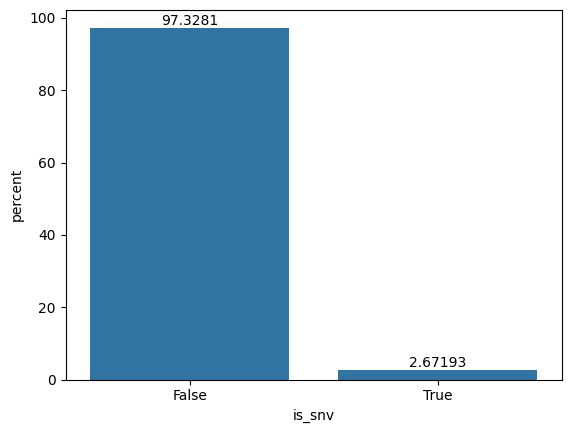

In [28]:
# Check for the proportion of SNV and non SNV
ax = sns.countplot(df, x="is_snv", stat="percent")
ax.bar_label(ax.containers[0])

In [99]:
df.columns

Index(['Unnamed: 0', 'Chr', 'START_POS_REF', 'END_POS_REF', 'REF', 'ALT',
       'REF_MFVdVs', 'ALT_MFVdVs', 'Sample_Name', 'FILTER_Mutect2',
       'FILTER_Freebayes', 'FILTER_Vardict', 'FILTER_Varscan', 'm2_MQ',
       'm2_FS', 'm2_MQ0', 'm2_MQRankSum', 'm2_NLOD', 'm2_PON', 'f_MQMR',
       'f_MQM', 'f_AB', 'f_ABP', 'f_AC', 'f_AF', 'f_AN', 'f_AO', 'f_GTI',
       'f_LEN', 'f_MEANALT', 'f_MIN_DP', 'f_NS', 'f_NUMALT', 'f_ODDS',
       'f_PAIRED', 'f_PAIREDR', 'f_PAO', 'f_PQA', 'f_PQR', 'f_PRO', 'f_QA',
       'f_QR', 'f_RO', 'f_RPL', 'f_RPP', 'vs_DP', 'vs_GPV', 'vs_SPV', 'vs_SSC',
       'vd_AF', 'vd_DP', 'vd_MSI', 'vd_SAMPLE', 'vd_SOR', 'vd_SSF', 'vd_VD',
       'is_snv'],
      dtype='object')

<Axes: xlabel='is_snv', ylabel='count'>

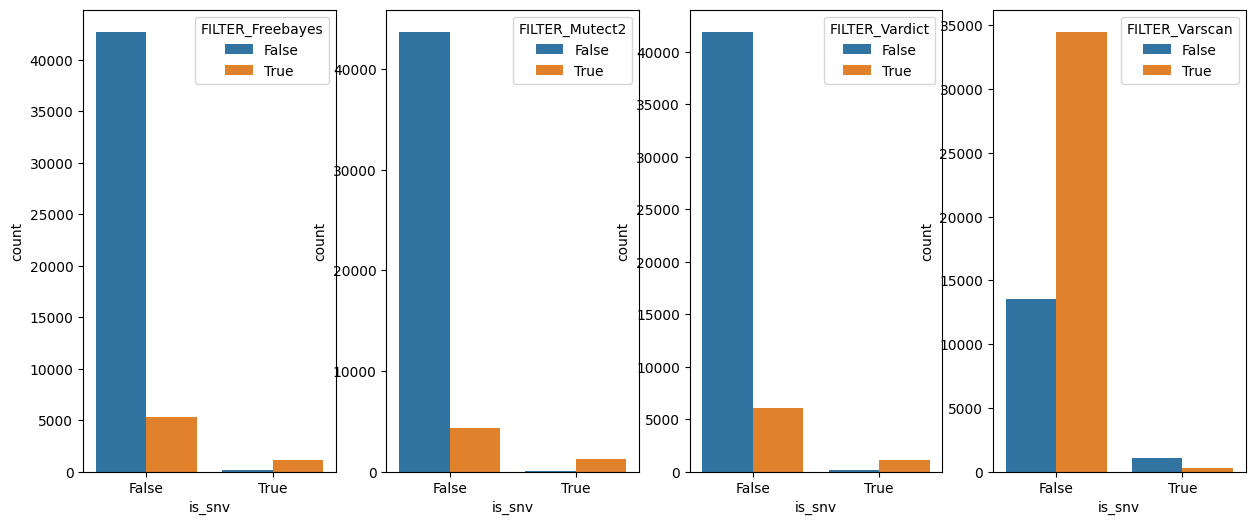

In [132]:
fig, axs = plt.subplots(1, 4, figsize=(15,6))

sns.countplot(df, x="is_snv", stat="count",hue='FILTER_Freebayes', ax=axs[0])
sns.countplot(df, x="is_snv", stat="count",hue='FILTER_Mutect2', ax=axs[1])
sns.countplot(df, x="is_snv", stat="count",hue='FILTER_Vardict', ax=axs[2])
sns.countplot(df, x="is_snv", stat="count",hue='FILTER_Varscan', ax=axs[3])

In [126]:
sns.pairplot(df[list_of_numerical])

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7fd33a39c550> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fd329a56670> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [130]:
df[list_of_numerical].var().sort_values(ascending=False)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning:

invalid value encountered in subtract



END_POS_REF      2.982902e+15
START_POS_REF    2.982902e+15
Unnamed: 0       2.030794e+08
f_QA             8.956769e+07
f_QR             3.767802e+07
vs_DP            1.183095e+06
f_AO             7.189940e+04
m2_MQ0           5.442534e+04
f_RO             3.487964e+04
f_ABP            2.013485e+04
vd_DP            1.485372e+04
f_RPL            1.060094e+04
vd_VD            9.442963e+03
f_ODDS           8.971867e+03
f_RPP            5.316956e+03
m2_NLOD          2.761257e+03
vs_SSC           2.989910e+02
f_MQMR           2.437422e+02
f_MQM            2.234367e+02
m2_FS            1.557046e+02
m2_MQ            4.992708e+01
vd_MSI           2.834330e+01
m2_MQRankSum     4.634673e+00
f_LEN            2.815144e+00
f_AC             6.233222e-01
f_AN             2.008993e-01
f_MEANALT        1.530052e-01
vs_GPV           7.428989e-02
f_PAIRED         6.143798e-02
vd_AF            5.390327e-02
f_AF             5.198387e-02
f_PAIREDR        4.714828e-02
vd_SSF           3.461165e-02
f_AB      

# Feature Selection

# Dummy Section